In [78]:
import numpy as np
from scipy.io import loadmat
import scipy
from scipy.stats import multivariate_normal
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the training and testing data for digits 5 and 6
Numpyfile_training_5 = scipy.io.loadmat('training_data_5.mat')
Numpyfile_testing_5 = scipy.io.loadmat('testing_data_5.mat')
Numpyfile_training_6 = scipy.io.loadmat('training_data_6.mat')
Numpyfile_testing_6 = scipy.io.loadmat('testing_data_6.mat')

# Combine the data from both training and testing sets for digits 5 and 6
# Storing Loaded data into dictionaries
images_train_5 = Numpyfile_training_5['train_data_5']
images_train_6 = Numpyfile_training_6['train_data_6']
images_test_5 = Numpyfile_testing_5['test_data_5']
images_test_6 = Numpyfile_testing_6['test_data_6']


print(images_train_5.shape)
print(images_train_6.shape)
print(images_test_5.shape)
print(images_test_6.shape)


(5421, 28, 28)
(5918, 28, 28)
(892, 28, 28)
(958, 28, 28)


In [79]:
#Now we vectorize the 28*28 array to 784 d . Basically flattening the 2d array to single array
#For Training Data
train_5_flattened = images_train_5.reshape(images_train_5.shape[0], -1)
train_6_flattened = images_train_6.reshape(images_train_6.shape[0], -1)
print(train_5_flattened.shape, train_6_flattened.shape)

#Same For Testing Data

test_5_flattened = images_test_5.reshape(images_test_5.shape[0], -1)
test_6_flattened = images_test_6.reshape(images_test_6.shape[0], -1)
print(test_5_flattened.shape, test_6_flattened.shape)

(5421, 784) (5918, 784)
(892, 784) (958, 784)


In [80]:
#Now we get all the 5 and 6 images in the same 

X_cumulative_train_data = np.concatenate((train_5_flattened, train_6_flattened), axis=0) # axis = 0 means they stack on top of each other
X_cumulative_test_data = np.concatenate((test_5_flattened, test_6_flattened), axis=0)
print(X_cumulative_train_data.shape, X_cumulative_test_data.shape)

(11339, 784) (1850, 784)


In [81]:
# We are creating labels for each image which will be like a note. We are filling two arrays with zeros and ones.
# and we stack them on top of one another. 0 represents 5 and 1 represents 6.
#For training data
y_label_train = np.hstack((np.zeros(images_train_5.shape[0], dtype='int'), np.ones(images_train_6.shape[0], dtype='int')))

# For testing data
y_label_test = np.hstack((np.zeros(images_test_5.shape[0], dtype='int'), np.ones(images_test_6.shape[0], dtype='int')))
print(y_label_train.shape, y_label_test.shape)

(11339,) (1850,)


In [82]:
# Now we normalize data, basically keeping the mean as 0 and standard deviation between 0 and 1
# Doing that helps it simple to analyze the data. Analog


x_train_mean_array = np.mean(X_cumulative_train_data, axis = 0) # An array/vector of means for all the images, stacked on top of one another
x_train_standard_deviation_array = np.std(X_cumulative_train_data, axis = 0) # An Array/vector of standard means of all the images, stacked on top of one another

epsilon = 1e-8

print("Shape of mean vector: {}".format(x_train_mean_array.shape))
print("Shape of std vector: {}".format(x_train_standard_deviation_array.shape))

# In case standard deviation is 0, we change it to a slightest of value to make it greater than 0 because it is denominator
x_train_standard_deviation_array = np.where(x_train_standard_deviation_array == 0, epsilon, x_train_standard_deviation_array) 

normalized_X_train = (X_cumulative_train_data - x_train_mean_array)/x_train_standard_deviation_array  # Using the formula   yi = (xi - mi)/si

print("Shape of normalized Training data: {}".format(normalized_X_train.shape))


x_test_mean_array = np.mean(X_cumulative_test_data, axis = 0) # An array/vector of means for all the images, stacked on top of one another
x_test_standard_deviation_array = np.std(X_cumulative_test_data, axis = 0) # An Array/vector of standard means of all the images, stacked on top of one another



# In case standard deviation is 0, we change it to a slightest of value to make it greater than 0 because it is denominator
x_test_standard_deviation_array = np.where(x_test_standard_deviation_array == 0, epsilon, x_test_standard_deviation_array) 

normalized_X_test = (X_cumulative_test_data - x_test_mean_array)/x_test_standard_deviation_array  # Using the formula   yi = (xi - mi)/si. 
# basically yi is the data with sd = 1 and mean = 0

print("Shape of normalized Testing data: {}".format(normalized_X_test.shape))


Shape of mean vector: (784,)
Shape of std vector: (784,)
Shape of normalized Training data: (11339, 784)
Shape of normalized Testing data: (1850, 784)


In [83]:
n = normalized_X_train.shape[0]  # represents the number of data points in the data set
p = normalized_X_train.shape[1]  # represents the number of features in our data set

# Initialize the covariance matrix
cov_matrix_train_X = np.zeros((p, p))
#covariance matrix is basically used to find a relationship between the features using the data set in the matrix
# Calculate the covariance matrix
for i in range(p):
    for j in range(i, p):
        cov = np.sum((normalized_X_train[:, i] - np.mean(normalized_X_train[:, i])) * (normalized_X_train[:, j] - np.mean(normalized_X_train[:, j])) / (n - 1))
        cov_matrix_train_X[i, j] = cov
        cov_matrix_train_X[j, i] = cov  # The covariance matrix is symmetric

# Alternatively, you can use NumPy's built-in cov function
# cov_matrix_train_X = np.cov(normalized_X_train, rowvar=False)

print(cov_matrix_train_X.shape)

(784, 784)


In [84]:
# We know eigen vector has equation A * v = λ * v, where A is covariance matrix, v is eigen vector and λ is eigen value
# Eigen values show how much data is scattered or spread out in the direction it represents
# Eigen value is like the magnitude of the eigen vector
# If an eigenvalue is large, it means the associated eigenvector gets stretched a lot.
# Eigen vectors represent the direction in which data is spread
eigen_values_train_X, eigen_vectors_train_X = np.linalg.eig(cov_matrix_train_X) #
print(eigen_values_train_X.shape, eigen_vectors_train_X.shape)
eigen_pairs = [(np.abs(eigen_values_train_X[i]), eigen_vectors_train_X[:, i]) for i in range(eigen_values_train_X.shape[0])]
eigen_pairs.sort(key=lambda x: x[0], reverse=True)

#Eigen_pairs list of pairs made up absolute eigen value and their eigen vectors

(784,) (784, 784)


In [85]:
explained_variance_threshold = 0.95 # In gaussian data 2 SD span  to 95% of data
aggregate_variance = sum(eigen_values_train_X)  # Calculating total variance in our data
explained_variances = eigen_values_train_X / eigen_vectors_train_X # The explained variance of a principal component is the
# ratio of its eigenvalue to the associated eigenvector.
cumulative_variances = np.cumsum(eigen_values_train_X) / np.sum(eigen_values_train_X) # It calculates the cumulative sum of 
# eigenvalues and divides it by the total variance to get the cumulative explained variance.
num_principal_components = np.argmax(cumulative_variances >= explained_variance_threshold) + 1
# Here, you determine the number of principal components needed to meet the specified explained variance threshold.
#You find the index of the first element in the cumulative_variances array that is greater than or equal to the 
#Threshold and add 1 to it to get the number of principal components.

print("Total key principal components = " , num_principal_components)


#This line calculates the explained variance by using only the top two principal components. Determined in the problem statement.
explained_variance = np.sum(eigen_values_train_X[:2]) / aggregate_variance
cumulative_variances[:2] #extracts the cumulative explained variance for the first two principal components.

Total key principal components =  250


/var/folders/qf/8v50h2ys49j41pw6j1mhly900000gn/T/ipykernel_51946/2842205312.py:3: RuntimeWarning: divide by zero encountered in divide
  explained_variances = eigen_values_train_X / eigen_vectors_train_X # The explained variance of a principal component is the
/var/folders/qf/8v50h2ys49j41pw6j1mhly900000gn/T/ipykernel_51946/2842205312.py:3: RuntimeWarning: invalid value encountered in divide
  explained_variances = eigen_values_train_X / eigen_vectors_train_X # The explained variance of a principal component is the


array([0.08044782, 0.14642027])

In [86]:
# Project the data for the two PCAs that we selected for both test and train data

projection_matrix = np.hstack((eigen_pairs[0][1].reshape(-1, 1), eigen_pairs[1][1].reshape(-1, 1)))
print(projection_matrix.shape)

projected_train_data = normalized_X_train.dot(projection_matrix)
print(projected_train_data.shape)

projected_test_data = normalized_X_test.dot(projection_matrix)
print(projected_test_data.shape)

(784, 2)
(11339, 2)
(1850, 2)


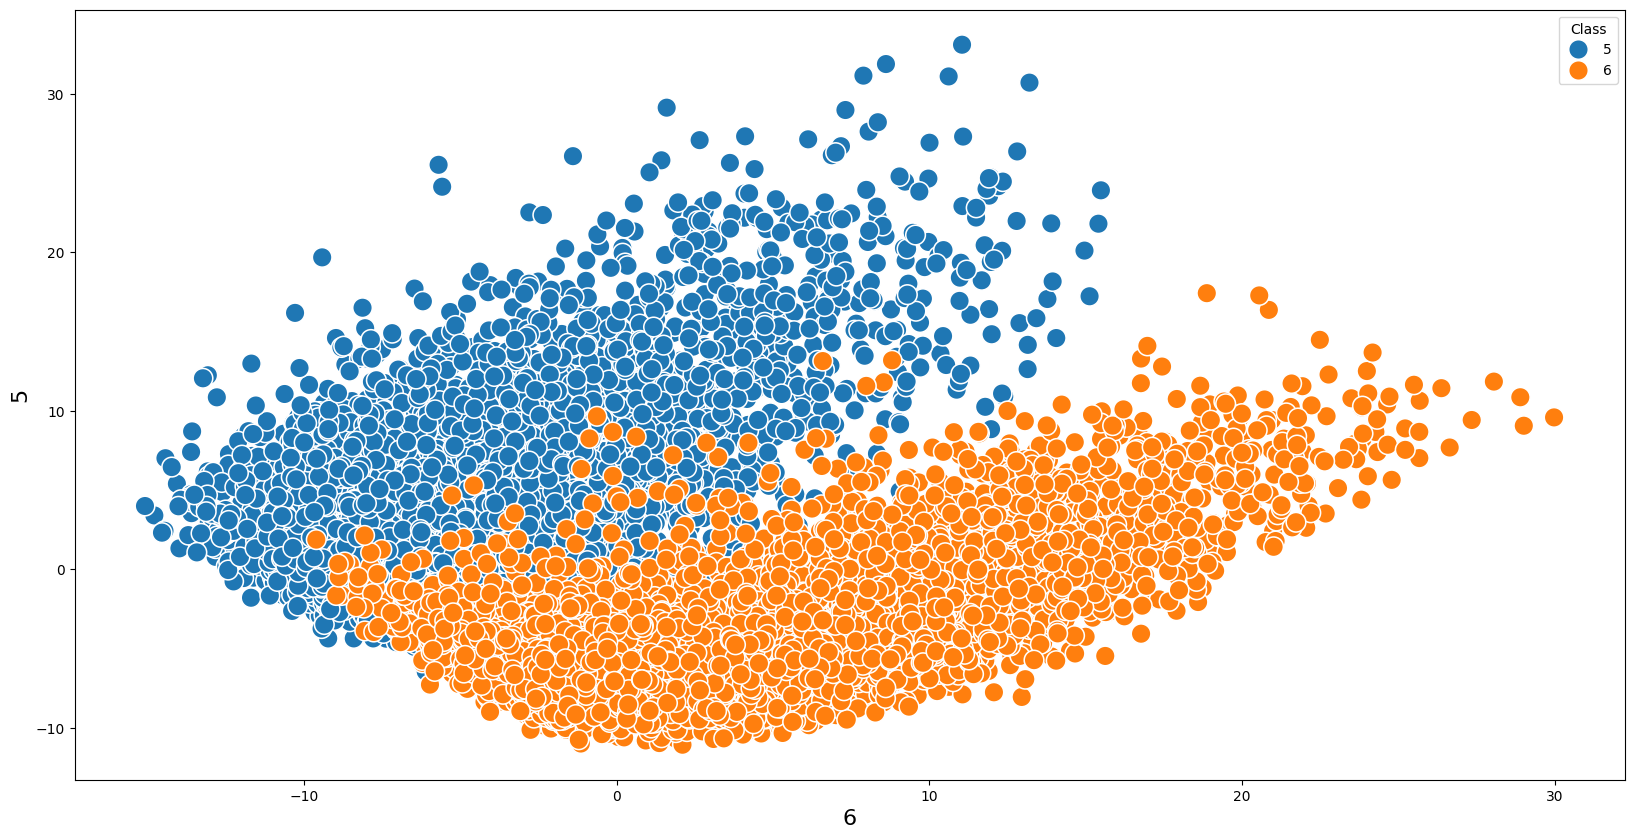

In [87]:
# Create DataFrames for training and test data
train_data_frame = pd.DataFrame(projected_train_data)
train_data_frame['Y'] = y_label_train

test_data_frame = pd.DataFrame(projected_test_data)
test_data_frame['Y'] = y_label_test

# Set the figure size and axis labels
plt.figure(figsize=(20, 10))
plt.ylabel('5', fontsize=16)
plt.xlabel('6', fontsize=16)

# Create the scatterplot
scatter = sns.scatterplot(data=train_data_frame, x=0, y=1, hue=train_data_frame['Y'], s=200)

# Relabel the legend explicitly
legend = scatter.legend()
legend.set_title('Class')
legend.get_texts()[0].set_text('5')
legend.get_texts()[1].set_text('6')


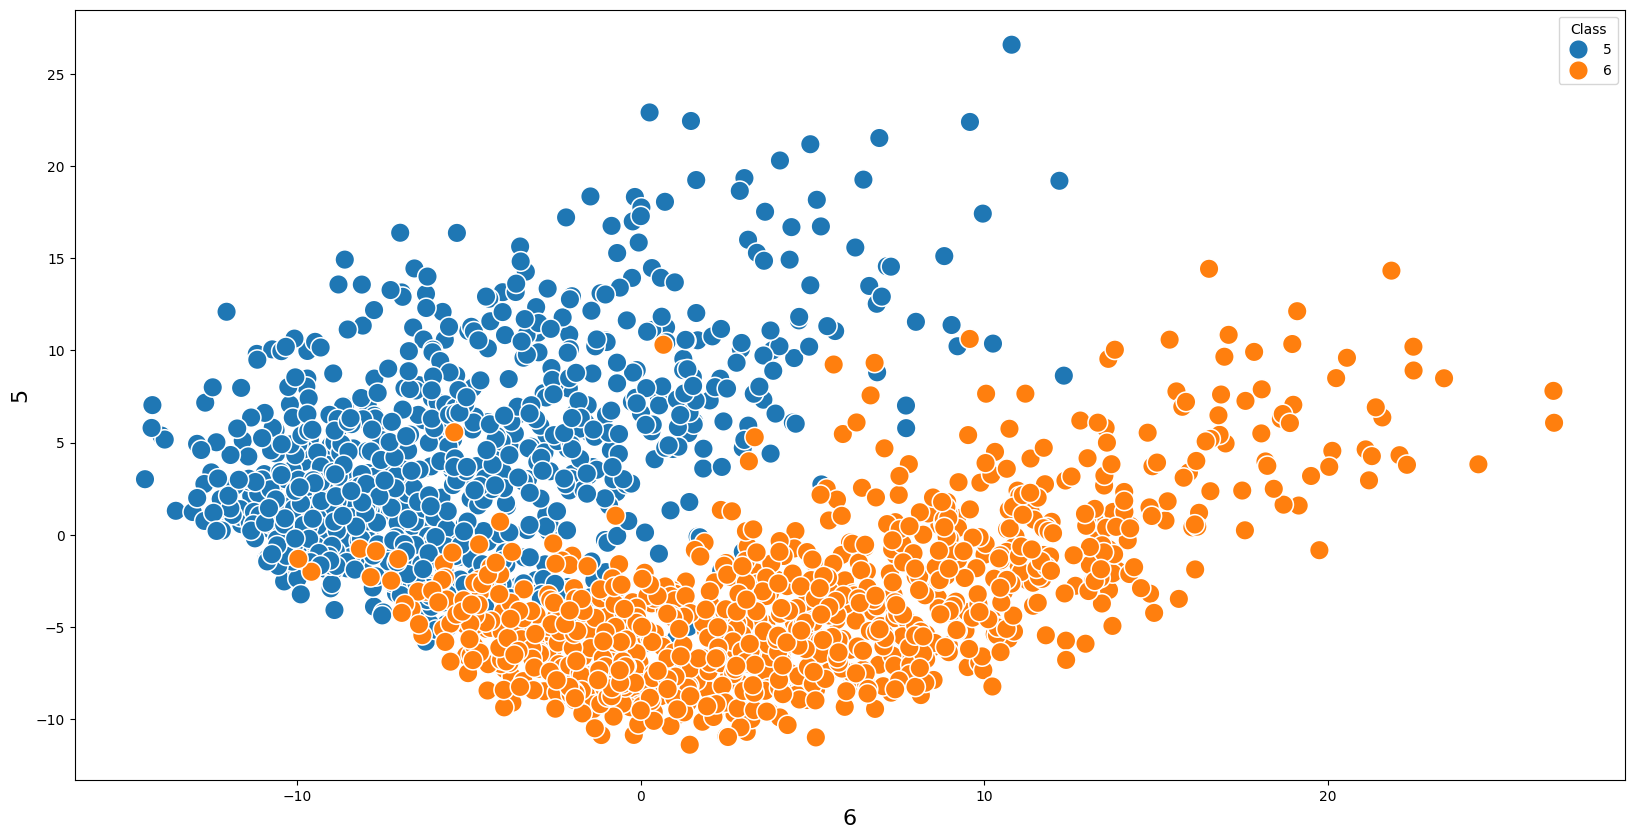

In [88]:
#Similarly plotting graph for Test Data

plt.figure(figsize=(20, 10))
plt.ylabel('5', fontsize=16)
plt.xlabel('6', fontsize=16)
scatter= sns.scatterplot(data = test_data_frame, x=0,y=1, hue=test_data_frame['Y'], s=200)

legend = scatter.legend()
legend.set_title('Class')
legend.get_texts()[0].set_text('5')
legend.get_texts()[1].set_text('6')


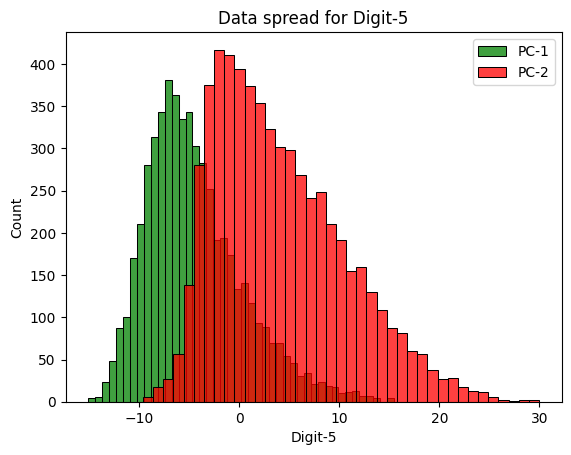

In [89]:
x5_0 = []
x5_1 = []

# Iterate through the rows of the DataFrame
for index, row in train_data_frame.iterrows():
    if row['Y'] == 0:
        x5_0.append(row[0])
    elif row['Y'] == 1:
        x5_1.append(row[0])

# Convert the lists to NumPy arrays
x5_0 = np.array(x5_0)
x5_1 = np.array(x5_1)

# Digit 5 spread for PC0 and PC1
sns.histplot(x5_0, color='green', label='PC-1')
sns.histplot(x5_1, color='red', label='PC-2')
plt.gca().set(title='Data spread for Digit-5', xlabel='Digit-5')
plt.legend()

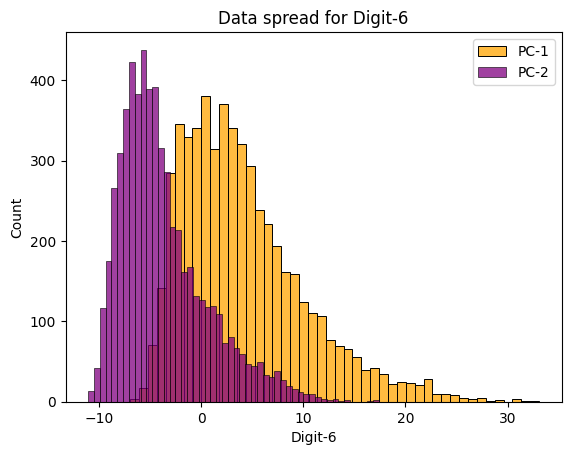

In [90]:
x6_0 = []
x6_1 = []

# Iterate through the rows of the DataFrame
for index, row in train_data_frame.iterrows():
    if row['Y'] == 0:
        x6_0.append(row[1])
    elif row['Y'] == 1:
        x6_1.append(row[1])

# Convert the lists to NumPy arrays
x6_0 = np.array(x6_0)
x6_1 = np.array(x6_1)

# Digit 6 spread for PC0 and PC1
sns.histplot(x6_0, color='orange', label='PC-1')
sns.histplot(x6_1, color='purple', label='PC-2')
plt.gca().set(title='Data spread for Digit-6', xlabel='Digit-6')
plt.legend()

Y
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
Name: 0, dtype: object

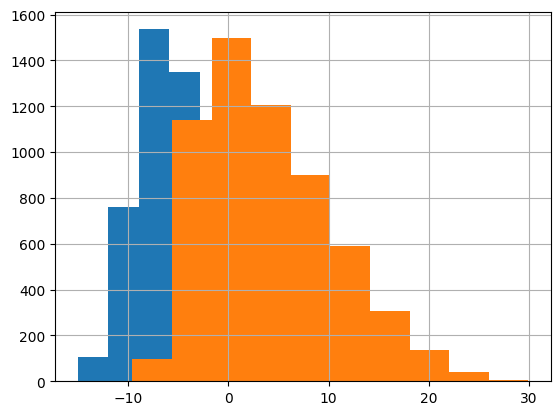

In [91]:
# Digit 5 histogram depiction for PC1 and PC2
train_data_frame.groupby('Y')[0].hist()

Y
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
Name: 1, dtype: object

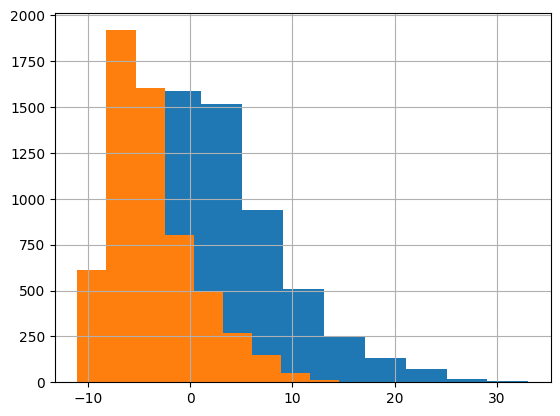

In [92]:
# Digit 6 histogram depiction for PC1 and PC2
train_data_frame.groupby('Y')[1].hist()

In [93]:
mean_class_five = np.mean(train_data_frame[[0, 1]][train_data_frame['Y'] == 0], axis=0) # We calculate the mean vector for data frame of digit 5
print("Mean Vector for Class 5: ")
print(mean_class_five)

covariance_matrix_for_five = np.cov(train_data_frame[[0, 1]][train_data_frame['Y'] == 0].T) # We compute the covariance matrix for same
covariance_matrix_for_five = np.real(covariance_matrix_for_five)   #So it does not include the complex values

mean_class_five = np.real(mean_class_five)
print("Covariance Matrix for Class 5: ")
print(covariance_matrix_for_five)

# below we create multivariate probability distribution for digit 5, so it gets easier to determine data points similar to 5. due to variation
scatter_for_five = multivariate_normal(mean_class_five, covariance_matrix_for_five) 

Mean Vector for Class 5: 
0   -4.453208
1    4.069514
dtype: float64
Covariance Matrix for Class 5: 
[[23.39792722 15.13683919]
 [15.13683919 36.44222348]]


In [94]:
mean_class_six = np.mean(train_data_frame[[0, 1]][train_data_frame['Y'] == 1], axis = 0) # We calculate the mean vector for data frame of digit 6

print("Mean Vector for Class 6: ")
print(mean_class_six)

covariance_matrix_for_six = np.cov(train_data_frame[[0, 1]][train_data_frame['Y'] == 1].T)
covariance_matrix_for_six = np.real(covariance_matrix_for_six)   #So it does not include the complex values

mean_class_six = np.real(mean_class_six)
print("Covariance Matrix for Class 6: ")
print(covariance_matrix_for_six)

# below we create multivariate probability distribution for digit 6, so it gets easier to determine data points similar to 5. due to variation
scatter_for_six = multivariate_normal(mean_class_six, covariance_matrix_for_six)


Mean Vector for Class 6: 
0    4.079222
1   -3.727752
dtype: float64
Covariance Matrix for Class 6: 
[[42.26796598 17.94673872]
 [17.94673872 18.3339439 ]]


In [95]:
# to calculate the probability density function (PDF) of x. The PDF 
# indicates how likely the data point x is to belong to class "5" based on the distribution parameters
# LAMBDA FUNCTION USES scatter_for_five object which represents multivariate normal distribution. in x dimensions (x = no. of features)
probability_of_train_x_five = lambda x: scatter_for_five.pdf(x)
probability_of_train_x_six = lambda x: scatter_for_six.pdf(x)

In [96]:
# In summary, the classify function takes a data point and uses the probabilities of belonging to each class to 
# make a classification decision. It returns 0 for class "5" or 1 for class "6" 
# based on which class has the higher probability. 


def classify(datapoint, probability_five=0.5, probablity_six=0.5):
        
    p_five_x = probability_of_train_x_five(datapoint) * probability_five
    p_six_x = probability_of_train_x_six(datapoint) * probablity_six
    
    if p_five_x >= p_six_x:
        return 0
    return 1

In [97]:
# total 5 digits / total of 5 and 6
probability_five = train_5_flattened.shape[0]/X_cumulative_train_data.shape[0]
# total 6 digits / total of 5 and 6
probablity_six = train_6_flattened.shape[0]/X_cumulative_train_data.shape[0]
print(probability_five, probablity_six)

0.47808448716818064 0.5219155128318194


In [98]:
# On an estimate, we can consider the probabilities of 5 and 6 to be 0.5 each.
probability_five = 0.5
probablity_six = 0.5

# based on projection matrix of top two PCAs we classify the digits as 5 or 6 from normalized data
y_predicted_train = [classify(i, probability_five=probability_five, probablity_six=probablity_six) for i in projected_train_data]
y_predicted_test = [classify(i, probability_five=probability_five, probablity_six=probablity_six) for i in projected_test_data]


#add new columns to your DataFrames train_data_frame and test_data_frame to store the predicted class labels for each data point.
train_data_frame['Y_pred'] = y_predicted_train
test_data_frame['Y_pred'] = y_predicted_test

In [99]:
#compare the predicted classifications to the true class labels and evaluate the performance of your classification model

training_acc = np.mean(train_data_frame['Y'] == train_data_frame['Y_pred'])
print(training_acc)

0.9427639121615663


In [100]:
#Do same for test data

testing_acc = np.mean(test_data_frame['Y'] == test_data_frame['Y_pred'])
print(testing_acc)

0.9394594594594594
